![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

Ideias e funções: Luan Lima \& Bernardo Costa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Calculando o mínimo de uma função

Encontrar o mínimo de uma função derivável é (quase) equivalente a resolver a equação $f'(x) = 0$.

Vamos explorar algumas destas ideias.

# 1: Funções básicas

## Métodos de bisseção e Newton

In [2]:
def bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    
    O algoritmo termina quando o tamanho do intervalo ficar menor do que  xtol,
    ou quando o valor absoluto da função ficar abaixo de  ytol.
    """
    assert f(a)*f(b) < 0
    pts = [a,b]
    raiz = (a + b)/2
    while (abs(a - b) > xtol) and (abs(f(raiz)) > ytol):
        if f(a)*f(raiz) < 0:
            b = raiz
        else:
            a = raiz
        pts.append(raiz)
        raiz = (a + b)/2
    return pts

In [3]:
def newton_pts(f, df, x, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Método de Newton para encontrar uma raiz de  f  a partir do valor inicial  x.
    Retorna todos os pontos pelos quais o algoritmo passa.
    
    O algoritmo termina quando o tamanho do passo é menor do que  xtol,
    quando o valor absoluto da função ficar abaixo de  ytol,
    ou após  maxiter  iterações.
    """
    contador = 0
    pts = [x]
    while (contador < maxiter):
        last_x = pts[-1]
        new_x = last_x - (f(last_x)/df(last_x))
        pts.append(new_x)
        if abs(new_x - last_x) <= xtol or abs(f(new_x)) <= ytol:
            break
        contador += 1
    return pts

## Derivadas numéricas

Dê, abaixo, as funções para calcular a primeira e a segunda derivadas numéricas.

In [4]:
def df_central(f, x, h=1e-5):
    """Derivada central de  f  em  x, com passo  h"""
    return (f(x+h) - f(x-h))/(2*h)

def ddf_central(f, x, h=1e-4):
    """Aproximação da segunda derivada de  f  em  x, usando a derivada central iterada com passo  h."""
    return (df_central(f, x+h) - df_central(f, x-h))/(2*h)

## Erro de aproximação da derivada central iterada

Varie $h$ no intervalo $[2^{-27}, 2^0]$,
e faça um gráfico do erro da derivada central iterada para derivada segunda,
para a exponencial em $x = 0$.

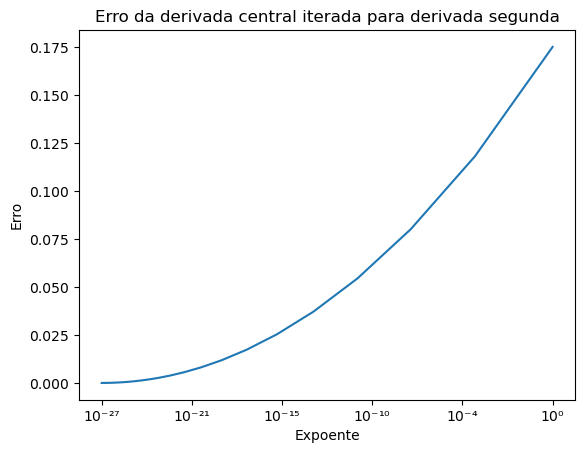

In [5]:
hs = np.logspace(-27,0,base=2, num=100)

def get_err(f, x):
    return [
        abs(
            df_central(
                f,
                x,
                h
            ) - f(x)
        )
        for h in hs
    ]

err = get_err(np.exp, 0)

plt.plot(hs, err)
plt.title("Erro da derivada central iterada para derivada segunda")
plt.xlabel("Expoente")
plt.ylabel("Erro")
plt.xticks(
    ticks=[n/10 for n in range(0,11,2)],
    labels=["$10⁻²⁷$", "$10⁻²¹$", "$10⁻¹⁵$", "$10⁻¹⁰$", "$10⁻⁴$", "$10⁰$"]
)

ax = plt.gca()

In [6]:
assert len(ax.lines) == 1
assert len(ax.title.get_text()) > 10
assert ax.get_xlabel() != ""

Como esse gráfico muda se escolhermos outros pontos no intervalo $[-2,2]$?
- Use erros relativos; e
- faça várias curvas no mesmo gráfico.

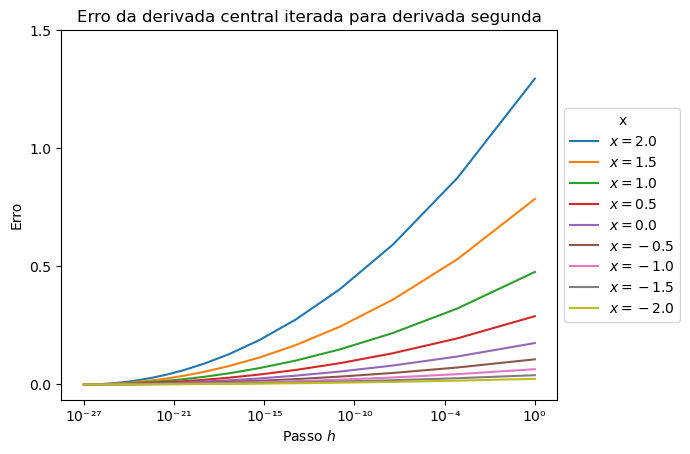

In [7]:
hs = np.logspace(-27,0,base=2, num=100)

for x in range(20, -25, -5):
    err = get_err(np.exp, x/10)
    plt.plot(hs, err, label=f"$x={x/10}$")

plt.title("Erro da derivada central iterada para derivada segunda")
plt.xlabel("Passo $h$")
plt.ylabel("Erro")
plt.xticks(
    ticks=[n/10 for n in range(0,11,2)],
    labels=["$10⁻²⁷$", "$10⁻²¹$", "$10⁻¹⁵$", "$10⁻¹⁰$", "$10⁻⁴$", "$10⁰$"]
)
plt.yticks([i/10 for i in range(0,20,5)])

plt.legend(title="x", bbox_to_anchor=(1,0.5), loc="center left")

ax = plt.gca()

In [8]:
assert len(ax.lines) >= 8
assert len(ax.title.get_text()) > 10
assert ax.get_xlabel() != ""

Comente.

Pelo gráfico é possível notar que quanto menor o passo $h$, menor o erro. Já que a função $e^{x}$
cresce mais rápido para valores positivos, essa diferença é mais notável para valores de $x$
maiores que zero.

# 2: Um problema modelo

Vamos minimizar a função $f(x) = e^x - 2x$.

In [9]:
def f(x):
    return np.exp(x) - 2*x

## Preparando a bisseção

Escreva 3 funções:
- a derivada analítica $g_1(x) = f'(x)$
- a derivada central $g_2(x)$ com passo `h = 1e-3`
- a derivada central $g_2(x)$ com passo `h = 1e-5`

In [10]:
def g1(x):
    return np.exp(x) - 2

def g2(x):
    return df_central(f, x, 1e-3)

def g3(x):
    return df_central(f, x, 1e-5)

In [11]:
np.random.seed(41)
for x in np.random.rand(10):
    assert np.isclose(g1(x), g2(x)), x
    assert np.isclose(g1(x), g3(x)), x

Faça o gráfico de $f(x)$ e determine um intervalo para fazer bisseção para encontrar um zero da derivada.

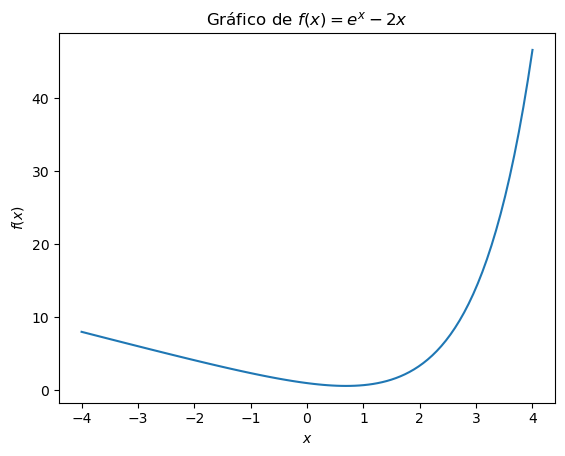

In [12]:
hs = np.linspace(-4,4,num=100)
fy = [f(i) for i in hs]

plt.plot(hs, fy)

plt.title("Gráfico de $f(x) = e^x - 2x$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

ax = plt.gca()

In [13]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

Qual intervalo você escolheria?
Porquê?

Eu escolheria o intervalo entre 0 e 2, visto que há um ponto crítico próximo ao ponto 1.

## Gráficos da bisseção

Aplique o método da bisseção usando $g_1$, $g_2$ e $g_3$ para encontrar uma raiz de $f$.

Faça um gráfico mostrando como evolui (ao longo das iterações)
a distância do ponto considerado até a raiz ($\log(2)$),
para cada um dos métodos.

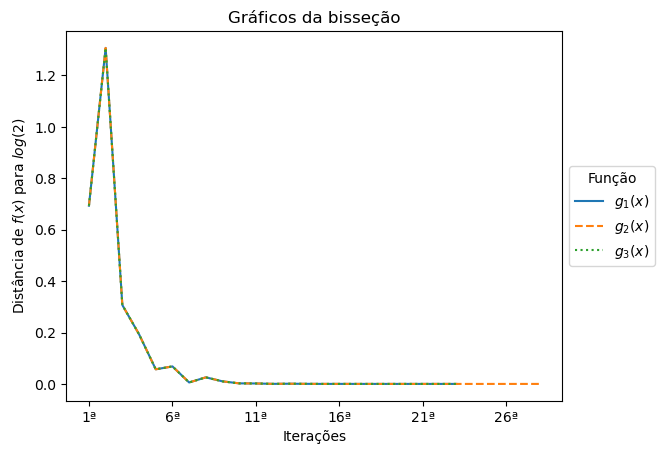

In [14]:
a = 0
b = 2

bg1 = [abs(i-np.log(2)) for i in bissecao_pts(g1, a, b)]
bg2 = [abs(i-np.log(2)) for i in bissecao_pts(g2, a, b)]
bg3 = [abs(i-np.log(2)) for i in bissecao_pts(g3, a, b)]

plt.plot(range(len(bg1)), bg1, label="$g_1(x)$", color="C0")
plt.plot(range(len(bg2)), bg2, label="$g_2(x)$", color="C1", linestyle='dashed')
plt.plot(range(len(bg3)), bg3, label="$g_3(x)$", color="C2", linestyle='dotted')

plt.title("Gráficos da bisseção")
plt.xlabel("Iterações")
plt.ylabel("Distância de $f(x)$ para $log(2)$")
plt.xticks(range(0,27,5), labels=[f"{i}ª" for i in range(1,28,5)])

plt.legend(title="Função", bbox_to_anchor=(1,0.5), loc="center left")

ax = plt.gca()

In [15]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

O que você vê no gráfico acima?
Como você explica?

As três funções tiveram resultados próximos durante as iterações no método da bisseção,
diferindo apenas no número de iterações (23, 28 e 23). Isso se dá pela similaridade da
precisão das funções, aferida anteriormente. A quantidade maior de iterações da função
$g_2$ se dá por conta do uso de um valor maior para o passo $h$.

## Newton

Para usar o método de Newton, será necessário usarmos mais uma derivada numérica.

Implemente
- $h_1(x)$, a segunda derivada analítica, e
- $h_2(x)$ a derivada numérica (que pode ser obtida a partir de `ddf_central`).

In [16]:
def h1(x):
    return np.exp(x)

def h2(x):
    return ddf_central(f, x)

In [17]:
np.random.seed(41)
for x in np.random.randn(10):
    assert np.isclose(h1(x), h2(x)), x

Agora, aplique o método de Newton (com tolerâncias padrão):
- com ambas as derivadas analíticas
- com a primeira derivada analítica, e a segunda numérica
- com ambas as derivadas numéricas (use a "melhor" derivada central que você puder).

Faça, como no caso da bisseção, o gráfico da distância até a mínimo da função.

Iterações: 1 >> 5, 2 >> 5, 3 >> 5


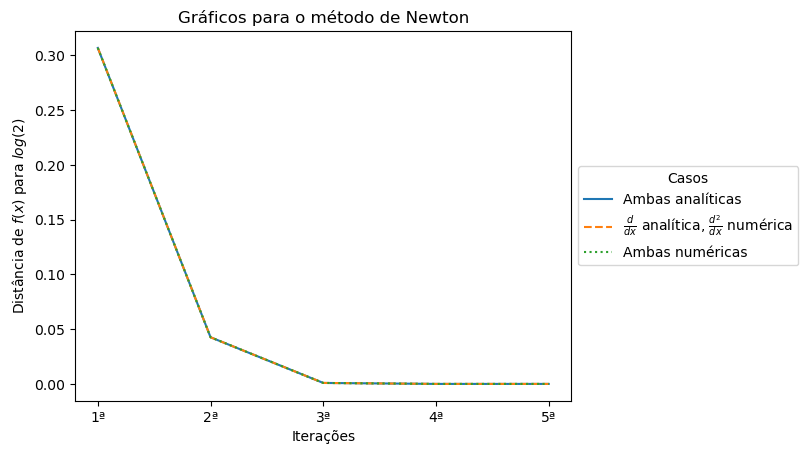

In [18]:
a = 0
b = 2

pnt1 = newton_pts(g1, h1, 1)
pnt2 = newton_pts(g1, h2, 1)
pnt3 = newton_pts(g3, h2, 1)

nt1 = [abs(i-np.log(2)) for i in pnt1]
nt2 = [abs(i-np.log(2)) for i in pnt2]
nt3 = [abs(i-np.log(2)) for i in pnt3]

plt.plot(range(len(nt1)), nt1, label="Ambas analíticas", color="C0")
plt.plot(range(len(nt2)), nt2, label="$\\frac{d}{dx}$ analítica, $\\frac{d^2}{dx}$ numérica", color="C1", linestyle='dashed')
plt.plot(range(len(nt3)), nt3, label="Ambas numéricas", color="C2", linestyle='dotted')

plt.title("Gráficos para o método de Newton")
plt.xlabel("Iterações")
plt.ylabel("Distância de $f(x)$ para $log(2)$")
plt.xticks(range(5), labels=[f"{i}ª" for i in range(1,6)])

print(f"Iterações: 1 >> {len(pnt1)}, 2 >> {len(pnt2)}, 3 >> {len(pnt3)}")

plt.legend(title="Casos", bbox_to_anchor=(1,0.5), loc="center left")

ax = plt.gca()

In [19]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Agora, reduza ambas as tolerâncias do método para `1e-15`, e refaça os gráficos.

Iterações: 1 >> 6, 2 >> 6, 3 >> 101


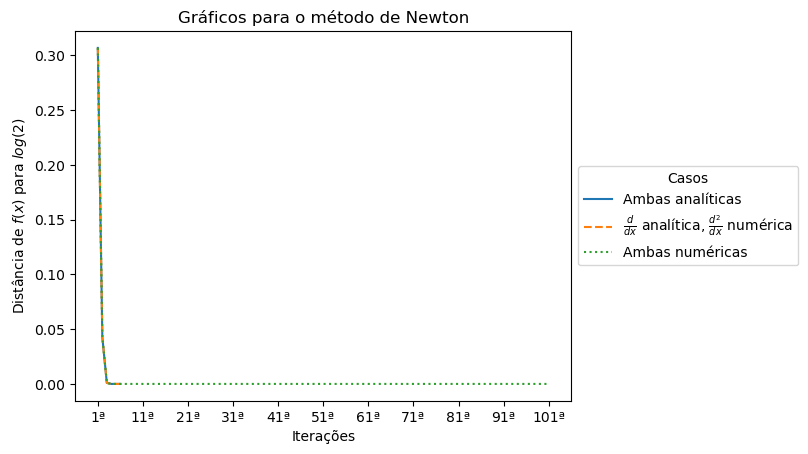

In [20]:
a = 0
b = 2

pnt1 = newton_pts(g1, h1, 1, 1e-15, 1e-15)
pnt2 = newton_pts(g1, h2, 1, 1e-15, 1e-15)
pnt3 = newton_pts(g3, h2, 1, 1e-15, 1e-15)

nt1 = [abs(i-np.log(2)) for i in pnt1]
nt2 = [abs(i-np.log(2)) for i in pnt2]
nt3 = [abs(i-np.log(2)) for i in pnt3]

plt.plot(range(len(nt1)), nt1, label="Ambas analíticas", color="C0")
plt.plot(range(len(nt2)), nt2, label="$\\frac{d}{dx}$ analítica, $\\frac{d^2}{dx}$ numérica", color="C1", linestyle='dashed')
plt.plot(range(len(nt3)), nt3, label="Ambas numéricas", color="C2", linestyle='dotted')

plt.title("Gráficos para o método de Newton")
plt.xlabel("Iterações")
plt.ylabel("Distância de $f(x)$ para $log(2)$")
plt.xticks(range(0,101,10), labels=[f"{i}ª" for i in range(1,102,10)])

print(f"Iterações: 1 >> {len(pnt1)}, 2 >> {len(pnt2)}, 3 >> {len(pnt3)}")

plt.legend(title="Casos", bbox_to_anchor=(1,0.5), loc="center left")

ax = plt.gca()

Deveria haver (pelo menos) duas diferenças entre este gráfico e o anterior.

- Quais você observa?
- Como você as explica?

A primeira diferença é o aumento em uma iteração no número de iterações dos casos
<b style="color:blue">azul</b> e <b style="color:orange">laranja</b> e a segunda diferença é a
não-convergência do caso <b style="color:green">verde</b>. Todas se explicam pela diminuição da
tolerância.

# 3: O mesmo problema, mais complicado

Queremos achar o mínimo da função $$ f(x) = e^{x^2-2x+1}-2^{x^3-6x+12} $$
no intervalo $[-2,2]$.

Defina $f$, e faça um gráfico para encontrar um intervalo para bisseção e um ponto inicial para Newton.

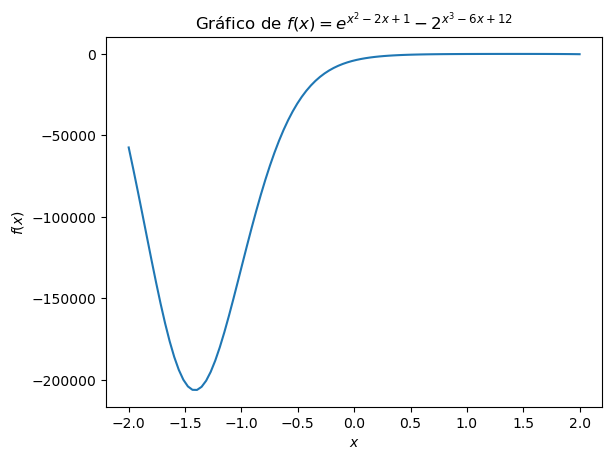

In [21]:
def f(x):
    return np.exp(
        np.power(x, 2) - (2*x) + 1
    ) - np.exp2(
        np.power(x, 3) - (6*x) + 12
    )

hs = np.linspace(-2,2,num=100)
fy = [f(i) for i in hs]

plt.plot(hs, fy)

plt.title("Gráfico de $f(x) = e^{x^2-2x+1}-2^{x^3-6x+12}$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

ax = plt.gca()

In [22]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

yvals = ax.lines[0].get_ydata()
assert min(yvals) <= -20000
assert np.all(yvals <= 0)

Defina a derivada (analítica) de f:

In [23]:
def g1(x):
    return (
        (
            np.exp(1 - 2*x + np.power(x,2))*(-2 + 2*x)
        ) - (
            np.exp2(12 - 6*x + np.power(x,3))*(-6 + 3*np.power(x,2))*np.log(2)
        )
    )

In [24]:
np.random.seed(2022)
for x in np.random.randn(10):
    assert np.isclose(g1(x), df_central(f, x), rtol=1e-8)

Calcule a raiz exata (a menos da precisão) do computador,
aplicando o método da bisseção à derivada analítica de $f$.

In [25]:
bpts = bissecao_pts(f, -3, -1, 1e-15, 1e-15)
print(f"f({bpts[-1]}) = {f(bpts[-1])}")

f(-2.187469443879279) = 6.548361852765083e-11


Calcule o valor de $f$ nos pontos obtidos.
Em qual/quais deles ocorreu o mínimo?

In [26]:
min_bpts = min([(x, f(x)) for x in bpts], key=lambda i: i[1])
print(f"min(f(x)) = f({min_bpts[0]}) = {min_bpts[1]}")

min(f(x)) = f(-1) = -131017.40184996686


Qual a distância deste ponto ao último ponto produzido pela bisseção?

In [27]:
print(
    np.sqrt(
        np.power(
            bpts[-1] - min_bpts[0], 2
        ) + np.power(
            f(bpts[-1]) - min_bpts[1], 2
        )
    )
)

131017.40185534822


O que você acha que aconteceu?

A grande distância entre o ponto de menor valor da função $f$ e a raiz se dá por conta de uma
concavidade dentro do intervalo inicial, visto que, eventualmente, a raiz em uma iteração chega a
esse ponto mínimo.

Agora, compare o erro com o método da bisseção e o de Newton, usando as derivadas numéricas.

Como sugerem as contas acima, aqui há vários problemas de precisão numérica.
Assim, tente botar tolerâncias pequenas, mas não pequenas demais para seus métodos.

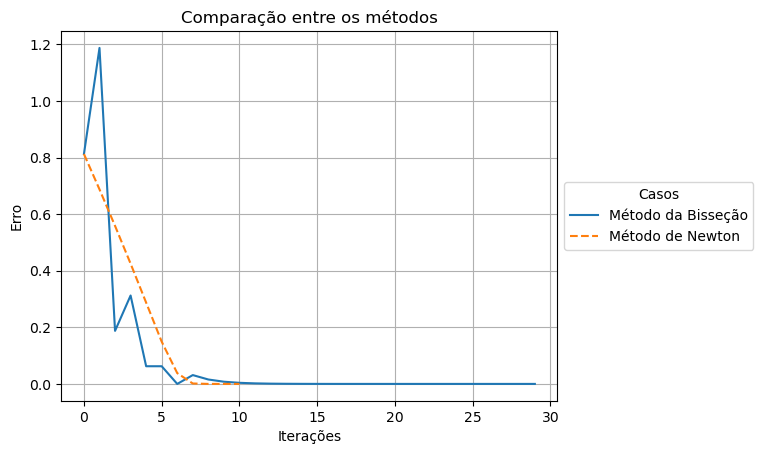

In [28]:
def ff(x):
    return np.exp(
        np.power(x, 2) - (2*x) + 1
    ) - np.exp2(
        np.power(x, 3) - (6*x) + 12
    )

def dff(x):
    return df_central(
        ff, x, 1e-8
    )

fbpts = [abs(i + 2.1875) for i in bissecao_pts(ff, -3, -1, 1e-8, 1e-8)]
fnt = [abs(i + 2.1875) for i in newton_pts(ff, dff, -3, 1e-8, 1e-8)]

plt.plot(range(len(fbpts)), fbpts, label="Método da Bisseção", color="C0")
plt.plot(range(len(fnt)), fnt, label="Método de Newton", color="C1", linestyle='dashed')

plt.title("Comparação entre os métodos")
plt.xlabel("Iterações")
plt.ylabel("Erro")

plt.legend(title="Casos", bbox_to_anchor=(1,0.5), loc="center left")

plt.grid()
ax = plt.gca()

In [29]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2

In [30]:
for l in ax.lines:
    ys = l.get_ydata()
    assert min(abs(ys)) < 1e-8

AssertionError: 